In [29]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt
import h5py
import math
import os
from scipy import signal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


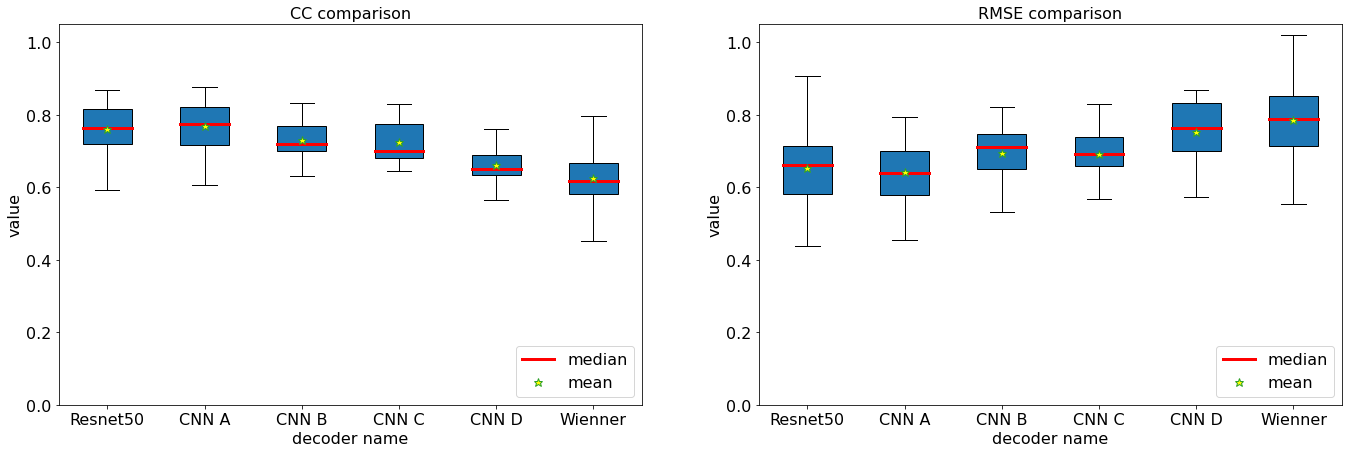

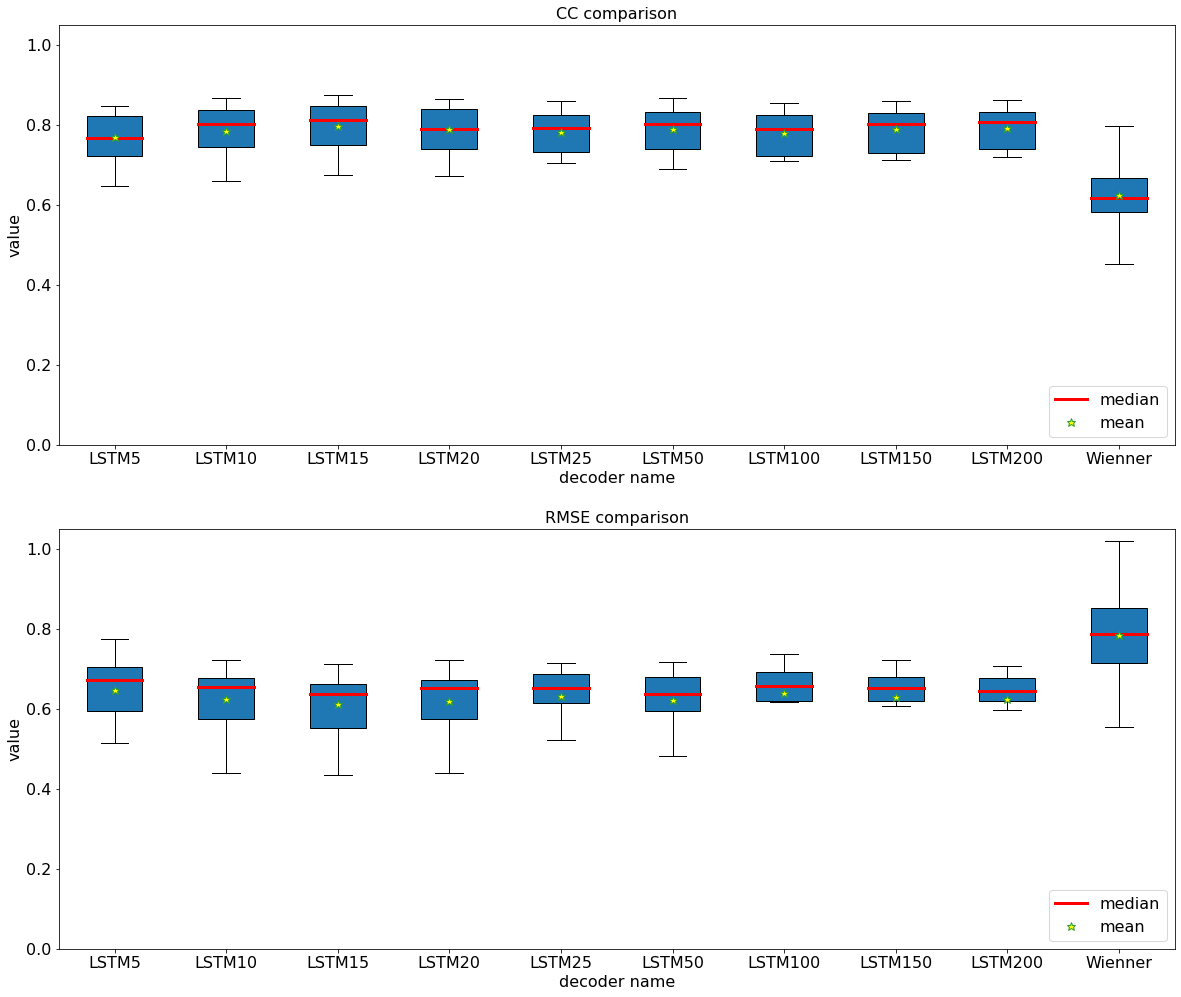

In [3]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt
import h5py
import math
import os
from scipy import signal

SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
result_dir = 'results/'
CNN_filenames=['indy_20160915_01_resnet50f10_mua_rate_128ms.h5','indy_20160915_01_resnetBnoadd10f_mua_rate_128ms.h5','indy_20160915_01_resnetBnoadd5f5d3_mua_rate_128ms.h5','indy_20160915_01_resnetBnoadd5f5d7_mua_rate_128ms.h5','indy_20160915_01_resnetBnoadd5f5d8_mua_rate_128ms.h5']
CNN_data_CC = []
CNN_data_RMSE = []
for index, name in enumerate(CNN_filenames):
    result_filename = result_dir+name
    with h5py.File(result_filename,'r') as f:
        Y_test  = f['Y_true'] 
        Y_test_predict = f['Y_predict'][()] 
        rmse_valid = f['rmse_valid'][()] 
        rmse_test= f['rmse_test'][()]
        cc_valid = f['cc_valid'][()]
        cc_test = f['cc_test'][()] 
        time_train = f['time_train'][()] 
        time_test = f['time_test'][()]
    CC = cc_valid.flatten()
    cc_to_add = CC.tolist()
    CC = cc_test.flatten()
    CNN_data_CC.append(cc_to_add+CC.tolist())
    RMSE = rmse_valid.flatten()
    rmse_to_add = RMSE.tolist()
    RMSE = rmse_test.flatten()
    CNN_data_RMSE.append(rmse_to_add+RMSE.tolist())

Wienner_names=['indy_20160915_01_wf_mua_rate_128ms.h5']
Wienner_data_CC = []
Wienner_data_RMSE = []

result_filename = result_dir+Wienner_names[0]
with h5py.File(result_filename,'r') as f:
    Y_test  = f['Y_true'] 
    Y_test_predict = f['Y_predict'][()] 
    rmse_valid = f['rmse_valid'][()] 
    rmse_test= f['rmse_test'][()]
    cc_valid = f['cc_valid'][()]
    cc_test = f['cc_test'][()] 
    time_train = f['time_train'][()] 
    time_test = f['time_test'][()]
CC = cc_valid.flatten()
cc_to_add = CC.tolist()
CC = cc_test.flatten()
Wienner_data_CC = cc_to_add+CC.tolist()
RMSE = rmse_valid.flatten()
rmse_to_add = RMSE.tolist()
RMSE = rmse_test.flatten()
Wienner_data_RMSE=rmse_to_add+RMSE.tolist()

LSTM_names = ['indy_20160915_01_10_lstm5_6e5_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e10_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e15_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e20_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e25_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e50_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e100_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e150_mua_rate_128ms.h5','indy_20160915_01_10_lstm5_6e200_mua_rate_128ms.h5']
LSTM_data_CC = []
LSTM_data_RMSE = []

for index, name in enumerate(LSTM_names):
    result_filename = result_dir+name
    with h5py.File(result_filename,'r') as f:
        Y_test  = f['Y_true'] 
        Y_test_predict = f['Y_predict'][()] 
        rmse_valid = f['rmse_valid'][()] 
        rmse_test= f['rmse_test'][()]
        cc_valid = f['cc_valid'][()]
        cc_test = f['cc_test'][()] 
        time_train = f['time_train'][()] 
        time_test = f['time_test'][()]
    CC = cc_valid.flatten()
    cc_to_add = CC.tolist()
    CC = cc_test.flatten()
    LSTM_data_CC.append(cc_to_add+CC.tolist())
    RMSE = rmse_valid.flatten()
    rmse_to_add = RMSE.tolist()
    RMSE = rmse_test.flatten()
    LSTM_data_RMSE.append(rmse_to_add+RMSE.tolist())

# LSTM_data_CC=[[],
#     [],
#     [],
#     [],
#     [],
# ] 
# LSTM_data_RMSE=[[],
#     [],
#     [],
#     [],
#     [],
# ] 
# CNN_data_CC=[[0.6909,0.7927,0.7703,0.7667,0.7792,0.8171,0.8086,0.8140,0.8371,0.7589,0.7717,0.7289,0.6408,0.7147,0.7621,0.7431,0.7788, 0.7733,0.7850,0.6809],# Resnet50
#     [0.6757,0.7905,0.7929,0.7730,0.7873,0.7756,0.7769,0.8399,0.8340,0.7657,0.7739,0.7693,0.7833,0.7680,0.7608,0.7832,0.7732,0.7520,0.7350,0.6662],#B no res
#     [0.6776,0.7794,0.7792,0.7622,0.6326,0.5994,0.7627,0.8000,0.8018,0.7174,0.7067,0.7080,0.7481,0.7564,0.7586,0.7272,0.7362,0.7230,0.7570,0.6260],
#     [0.7007,0.7361,0.6921,0.6934,0.7914,0.7296,0.7378,0.7367,0.7342,0.7002],
#     [0.6858,0.6925,0.6320,0.6645,0.7053,0.6448,0.7136,0.7046,0.6019,0.5771],
# ]
# CNN_data_RMSE=[[0.6419,0.6248,0.6449,0.5501,0.5342,0.5383,0.5564,0.6794,0.6609,0.6917,0.6688,0.7213,0.8553,0.7323,0.6404,0.7369,0.6913,0.6306,0.6145,0.6313],
#     [0.6678,0.6104,0.6090,0.5461,0.5199,0.5833,0.6001,0.6273,0.6776,0.6732,0.6508,0.6702,0.6430,0.6201,0.6342,0.6851,0.6952,0.6504,0.6535,0.6710],
#     [0.6356,0.6452,0.6445,0.5588,0.6528,0.7360,0.6255,0.7364,0.7496,0.7483,0.7686,0.7690,0.7055,0.6480,0.6625,0.7783,0.7711,0.6972,0.6556,0.6790],
#     [0.6503,0.5866,0.6635,0.8084,0.7172,0.7200,0.6856,0.7061,0.6934,0.6866],
#     [0.6668,0.6326,0.7075,0.8405,0.8271,0.8030,0.7165,0.7529,0.8207,0.7711],
# ] 
# Wienner_data_CC =   [0.52,0.68,0.68,0.70,0.70,0.69,0.69,0.57,0.57,0.57,0.58,0.66,0.66,0.65,0.65,0.65,0.65,0.65,0.65,0.61,0.62,0.58,0.58,0.59,0.59,0.62,0.62,0.62,0.62,0.53] 
# Wienner_data_RMSE = [0.75,0.79,0.79,0.70,0.61,0.66,0.65,0.71,0.71,0.89,0.85,0.82,0.83,0.86,0.86,0.87,0.86,0.74,0.74,0.83,0.82,0.81,0.82,0.90,0.90,0.81,0.80,0.77,0.76,0.75] 
ticks = ['Resnet50','CNN A','CNN B','CNN C','CNN D','Wienner'] 
data_cc= CNN_data_CC.append(Wienner_data_CC)
data_rmse=CNN_data_RMSE.append(Wienner_data_RMSE)
data_RMSE = list([Wienner_data_RMSE,CNN_data_RMSE])
fig_box_cnn, ax_box_cnn = plt.subplots(1,2)
fig_box_cnn.set_size_inches(23,7)
ax_box_cnn[0].set_title("CC comparison")
bp = ax_box_cnn[0].boxplot(CNN_data_CC,patch_artist=True,medianprops = dict(linestyle='-',linewidth=3.0
, color='red'),meanprops = dict(markersize = 9.0, marker='*', markerfacecolor = 'yellow'),showfliers=False,showmeans=True)
ax_box_cnn[0].set_ylim(bottom=0,top=1.05)
ax_box_cnn[0].set_xticklabels(ticks)
ax_box_cnn[0].legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'],loc='lower right')
ax_box_cnn[0].set(xlabel = 'decoder name',ylabel = 'value')
ax_box_cnn[1].set_title("RMSE comparison")
bp1 = ax_box_cnn[1].boxplot(CNN_data_RMSE,patch_artist=True,medianprops = dict(linestyle='-',linewidth=3.0
, color='red'),meanprops = dict(markersize = 9.0, marker='*', markerfacecolor = 'yellow'),showfliers=False,showmeans=True)
ax_box_cnn[1].set_ylim(bottom=0,top=1.05)
ax_box_cnn[1].set_xticklabels(ticks)
ax_box_cnn[1].set(xlabel = 'decoder name',ylabel = 'value')
ax_box_cnn[1].legend([bp1['medians'][0], bp1['means'][0]], ['median', 'mean'],loc='lower right')
plt.savefig('cnn_perf.jpg', bbox_inches='tight',dpi=600, pad_inches=0.1,format="jpg")  

ticks_lstm = ['LSTM5','LSTM10','LSTM15','LSTM20','LSTM25','LSTM50','LSTM100','LSTM150','LSTM200','Wienner'] 
data_cc_lstm= LSTM_data_CC.append(Wienner_data_CC)
data_rmse_lstm=LSTM_data_RMSE.append(Wienner_data_RMSE)
fig_box_LSTM, ax_box_LSTM = plt.subplots(2,1)
fig_box_LSTM.set_size_inches(20,17)
ax_box_LSTM[0].set_title("CC comparison")
bp = ax_box_LSTM[0].boxplot(LSTM_data_CC,patch_artist=True,medianprops = dict(linestyle='-',linewidth=3.0
, color='red'),meanprops = dict(markersize = 9.0, marker='*', markerfacecolor = 'yellow'),showfliers=False,showmeans=True)
ax_box_LSTM[0].set_ylim(bottom=0,top=1.05)
ax_box_LSTM[0].set_xticklabels(ticks_lstm)
ax_box_LSTM[0].legend(loc='lower right')
ax_box_LSTM[0].set(xlabel = 'decoder name',ylabel = 'value')
ax_box_LSTM[1].set_title("RMSE comparison")
ax_box_LSTM[0].legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'], loc = 'lower right')
bp1 = ax_box_LSTM[1].boxplot(LSTM_data_RMSE,patch_artist=True,medianprops = dict(linestyle='-',linewidth=3.0
, color='red'),meanprops = dict(markersize = 9.0, marker='*', markerfacecolor = 'yellow'),showfliers=False,showmeans=True)
ax_box_LSTM[1].set_ylim(bottom=0,top=1.05)
ax_box_LSTM[1].set_xticklabels(ticks_lstm)
ax_box_LSTM[1].set(xlabel = 'decoder name',ylabel = 'value')
ax_box_LSTM[1].legend([bp1['medians'][0], bp1['means'][0]], ['median', 'mean'], loc = 'lower right')
plt.savefig('LSTM_perf.jpg', bbox_inches='tight',dpi=600, pad_inches=0.1,format="jpg")  
